In [1]:
# Final Script to Estimate Number of Samples - Power Calculation - ANOVA Based
# Power and sample size calculation
# Including Effects of ICC (Considering Longitudinal Samples) and remove the effects of Covariates (i.e.; diet, antibiotics, illness)

# By: Ashok K. Sharma
# Date: 10-16-2024

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.regression.mixed_linear_model import MixedLM
from statsmodels.formula.api import mixedlm
from statsmodels.stats.power import FTestAnovaPower

import warnings
warnings.filterwarnings("ignore")

In [7]:
# Section1: without Dummy data ANOVA Based Sample Size estimation
    # Type1: For group comparison
        # Provide effect size range
        # Number of Groups to compare
    # Type2: For longitudinal datasets
        # Provide effect size range
        # Number of Groups to compare
        # Provide ICC value
        # Number of iterations for longitudinal measure
    # Type3: For longitudinal datasets with effects of Covariates
        # Provide effect size range
        # Number of Groups to compare
        # Provide ICC value ----> Higher ICC value was used to consider for Covariates
        # Number of iterations for longitudinal measure
        # Covariates information If Required

Welcome to the Sample Size Estimation Tool!
1. Normal dataset (no repeated measures)
2. Longitudinal dataset (repeated measures) - include ICC?
3. Longitudinal dataset (repeated measures) - remove covariate effects and include ICC


Please choose the type of dataset analysis (1, 2, or 3):  3


Performing sample size estimation for longitudinal data with covariate adjustment and ICC...
Effect Size: 0.2, Power: 0.7, ICC: 0.40, Sample Size per group: 34.13
Effect Size: 0.2, Power: 0.8, ICC: 0.40, Sample Size per group: 43.26
Effect Size: 0.2, Power: 0.9, ICC: 0.40, Sample Size per group: 57.61
Effect Size: 0.3, Power: 0.7, ICC: 0.40, Sample Size per group: 15.43
Effect Size: 0.3, Power: 0.8, ICC: 0.40, Sample Size per group: 19.57
Effect Size: 0.3, Power: 0.9, ICC: 0.40, Sample Size per group: 25.87
Effect Size: 0.4, Power: 0.7, ICC: 0.40, Sample Size per group: 8.91
Effect Size: 0.4, Power: 0.8, ICC: 0.40, Sample Size per group: 11.30
Effect Size: 0.4, Power: 0.9, ICC: 0.40, Sample Size per group: 14.78
Effect Size: 0.5, Power: 0.7, ICC: 0.40, Sample Size per group: 5.87
Effect Size: 0.5, Power: 0.8, ICC: 0.40, Sample Size per group: 7.39
Effect Size: 0.5, Power: 0.9, ICC: 0.40, Sample Size per group: 9.78
Effect Size: 0.6, Power: 0.7, ICC: 0.40, Sample Size per group: 4.35
Ef

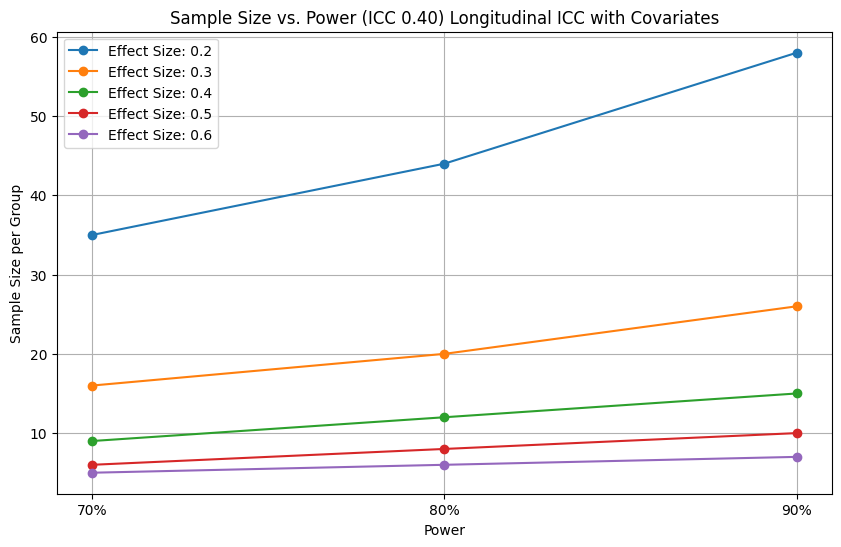

In [12]:
# Section1: Without Dummy data for RANGE OF Effect Sizes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.power import FTestAnovaPower

# Function to perform ANOVA-based sample size calculation
def sample_size_anova(effect_size, num_groups, alpha=0.05, power=0.8):
    analysis = FTestAnovaPower()
    sample_size_per_group = analysis.solve_power(effect_size=effect_size, nobs=None, alpha=alpha, power=power, k_groups=num_groups)
    return int(np.ceil(sample_size_per_group))

# Function to adjust sample size for ICC
def adjust_sample_size_for_icc(n, m, icc):
    return n / (1 + (m - 1) * icc)

# Plot function for different effect sizes
def plot_sample_size_multiple_effects(power_levels, sample_sizes, effect_sizes, icc=None, title_suffix=""):
    plt.figure(figsize=(10, 6))
    for effect_size in effect_sizes:
        plt.plot(power_levels, sample_sizes[effect_size], marker='o', label=f"Effect Size: {effect_size:.1f}")
    
    if icc is not None:
        plt.title(f'Sample Size vs. Power (ICC {icc:.2f}) {title_suffix}')
    else:
        plt.title(f'Sample Size vs. Power {title_suffix}')
    
    plt.xlabel('Power')
    plt.ylabel('Sample Size per Group')
    plt.xticks([0.7, 0.8, 0.9], labels=["70%", "80%", "90%"])
    plt.grid(True)
    plt.legend()
    plt.savefig(f'Figures/NoData_{title_suffix.replace(" ", "_")}.png')
    print(f"Figures/Plot saved: NoData_{title_suffix.replace(' ', '_')}.png")
    plt.show()

# =================== USER INTERFACE ===================

# Ask the user for input
print("Welcome to the Sample Size Estimation Tool!")
print("1. Normal dataset (no repeated measures)")
print("2. Longitudinal dataset (repeated measures) - include ICC?")
print("3. Longitudinal dataset (repeated measures) - remove covariate effects and include ICC")

choice = input("Please choose the type of dataset analysis (1, 2, or 3): ")

# Define effect sizes and other parameters
effect_sizes = np.round(np.arange(0.2, 0.7, 0.1), 1)  # Range of effect sizes from 0.2 to 0.6, rounded to 1 decimal place
num_groups = 2                           # Number of groups to compare
power_levels = [0.7, 0.8, 0.9]            # Desired power levels for analysis

# Dictionary to store sample sizes for each effect size
sample_sizes = {es: [] for es in effect_sizes}

if choice == "1":
    # Basic ANOVA-based Sample Size Calculation (no repeated measures, no ICC, no covariates)
    print("Performing basic ANOVA-based sample size estimation...")
    
    for effect_size in effect_sizes:
        for power in power_levels:
            n = sample_size_anova(effect_size, num_groups, power=power)
            sample_sizes[effect_size].append(n)
            print(f"Effect Size: {effect_size}, Power: {power}, Sample Size per group: {n}")

    # Plot sample size vs. power for multiple effect sizes (Basic ANOVA)
    plot_sample_size_multiple_effects(power_levels, sample_sizes, effect_sizes, title_suffix="Basic ANOVA")

elif choice == "2":
    # Longitudinal Data with ICC Adjustment
    print("Performing sample size estimation for longitudinal data with ICC adjustment...")

    # Simulated ICC value for demonstration purposes
    icc_value = 0.3
    num_timepoints = 10  # Number of time points for repeated measures

    for effect_size in effect_sizes:
        for power in power_levels:
            n = sample_size_anova(effect_size, num_groups, power=power)
            n_effective = adjust_sample_size_for_icc(n, num_timepoints, icc_value)
            sample_sizes[effect_size].append(int(np.ceil(n_effective)))
            print(f"Effect Size: {effect_size}, Power: {power}, ICC: {icc_value:.2f}, Sample Size per group: {n_effective:.2f}")

    # Plot sample size vs. power for multiple effect sizes with ICC adjustment
    plot_sample_size_multiple_effects(power_levels, sample_sizes, effect_sizes, icc=icc_value, title_suffix="Longitudinal ICC")

elif choice == "3":
    # Longitudinal Data with ICC and Covariate Adjustment
    print("Performing sample size estimation for longitudinal data with covariate adjustment and ICC...")

    # Simulated ICC value for demonstration purposes
    icc_value = 0.4
    num_timepoints = 10  # Number of time points for repeated measures

    for effect_size in effect_sizes:
        for power in power_levels:
            n = sample_size_anova(effect_size, num_groups, power=power)
            n_effective = adjust_sample_size_for_icc(n, num_timepoints, icc_value)
            sample_sizes[effect_size].append(int(np.ceil(n_effective)))
            print(f"Effect Size: {effect_size}, Power: {power}, ICC: {icc_value:.2f}, Sample Size per group: {n_effective:.2f}")

    # Plot sample size vs. power for multiple effect sizes with covariate adjustment
    plot_sample_size_multiple_effects(power_levels, sample_sizes, effect_sizes, icc=icc_value, title_suffix="Longitudinal ICC with Covariates")

else:
    print("Invalid choice. Please run the script again and choose a valid option.")

In [13]:
# Section2: First generate Dummy data - But don't compute Effect Size
    # Type1: For group comparison - Annova Based (Only effect size ranges will be used)
        # Provide effect size range
        # Number of Groups to compare
    # Type2: For longitudinal datasets - Linear Mixed model based (Shannon will be used for modeling not for effect size)
        # Provide effect size range
        # Number of Groups to compare
        # Provide ICC value
        # Number of iterations for longitudinal measure 
    # Type3: For longitudinal datasets with effects of Covariates - Linear Mixed model based (Shannon will be used for modeling not for effect size)
        # Provide effect size range
        # Number of Groups to compare
        # Provide ICC value ----> Higher ICC value was used to consider for Covariates
        # Number of iterations for longitudinal measure
        # Covariates information If Required

In [14]:
# Generate Dummy Data Same as Did for Micorbiome Specific Power Calculations
def simulate_cd_pilot_data_high_icc(num_subjects=50, num_timepoints=11):
    # Generate repeated measures for each subject (preconception + 10 longitudinal timepoints)
    subject_ids = np.repeat(np.arange(num_subjects), num_timepoints)
    time = np.tile(np.arange(num_timepoints), num_subjects)

    # Simulate Shannon diversity with increased random subject effect to increase ICC
    shannon_values = np.random.normal(3.0, 0.5, size=num_subjects * num_timepoints)

    # Increase random effects for each subject (higher variance to increase ICC)
    random_effects = np.random.normal(0, 0.5, size=num_subjects)  # Larger random effect for each subject
    shannon_values += np.repeat(random_effects, num_timepoints)

    # Time effect variability (you can reduce this if needed to increase ICC)
    time_effect = np.random.normal(0, 0.2, size=num_timepoints * num_subjects)  # Moderate time effect variation
    shannon_values += time_effect

    # Simulate covariates
    antibiotic_use = np.random.choice([0, 1], size=num_subjects * num_timepoints)  # Binary covariate
    illness = np.random.choice([0, 1], size=num_subjects * num_timepoints)  # Binary covariate
    diet = np.random.choice([0, 1], size=num_subjects * num_timepoints)  # Binary covariate

    # Simulate group labels (CD_flare, CD_asymptomatic)
    group_labels = np.random.choice(['CD_flare', 'CD_asymptomatic'], size=num_subjects * num_timepoints)

    # Moderate group effect size (difference between groups ~ 0.1 to 0.3)
    group_effect = np.where(group_labels == 'CD_flare', 0.1, -0.1)  # Smaller group difference for moderate effect size
    shannon_values += group_effect

    # Reduce within-group noise to increase ICC
    shannon_values += np.random.normal(0, 0.2, size=num_subjects * num_timepoints)  # Reduced noise within groups

    # Create DataFrame
    df = pd.DataFrame({
        'Subject_ID': subject_ids,
        'Time': time,
        'Shannon': shannon_values,
        'Antibiotic_Use': antibiotic_use,
        'Illness': illness,
        'Diet': diet,
        'Group': group_labels
    })
    
    return df

# Simulate the dataset with increased ICC and reduced effect size
df_cd_pilot_high_icc = simulate_cd_pilot_data_high_icc(num_subjects=50, num_timepoints=11)
print(df_cd_pilot_high_icc.head())
#df_cd_pilot_high_icc.to_csv("df_cd_pilot_highICC.csv") # Don't save it again and again

   Subject_ID  Time   Shannon  Antibiotic_Use  Illness  Diet            Group
0           0     0  2.378895               0        0     1  CD_asymptomatic
1           0     1  3.716532               1        0     1         CD_flare
2           0     2  3.308551               0        1     0         CD_flare
3           0     3  2.978407               0        1     1         CD_flare
4           0     4  2.899609               1        0     0         CD_flare


Data loaded successfully from data/df_cd_pilot_highICC.csv
Welcome to the Sample Size Estimation Tool!
1. Normal dataset (no repeated measures)
2. Longitudinal dataset (repeated measures) - include ICC?
3. Longitudinal dataset (repeated measures) - remove covariate effects and include ICC


Please choose the type of dataset analysis (1, 2, or 3):  3


Performing sample size estimation for longitudinal data with covariate adjustment and ICC...


Enter the column for analysis (e.g., Shannon):  Shannon
Please enter the covariates to adjust for (comma-separated, e.g., Antibiotic_Use,Illness,Diet):  Antibiotic_Use,Illness,Diet


           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  Shannon  
No. Observations:    550      Method:              REML     
No. Groups:          50       Scale:               0.3499   
Min. group size:     11       Log-Likelihood:      -552.5993
Max. group size:     11       Converged:           Yes      
Mean group size:     11.0                                   
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept          2.796    0.097 28.725 0.000  2.605  2.987
Group[T.CD_flare]  0.225    0.052  4.302 0.000  0.122  0.327
Time              -0.005    0.008 -0.585 0.559 -0.020  0.011
Antibiotic_Use    -0.011    0.053 -0.215 0.830 -0.115  0.092
Illness            0.065    0.052  1.242 0.214 -0.038  0.167
Diet               0.000    0.053  0.007 0.994 -0.104  0.105
Subject_ID Var     0.205    0.085   

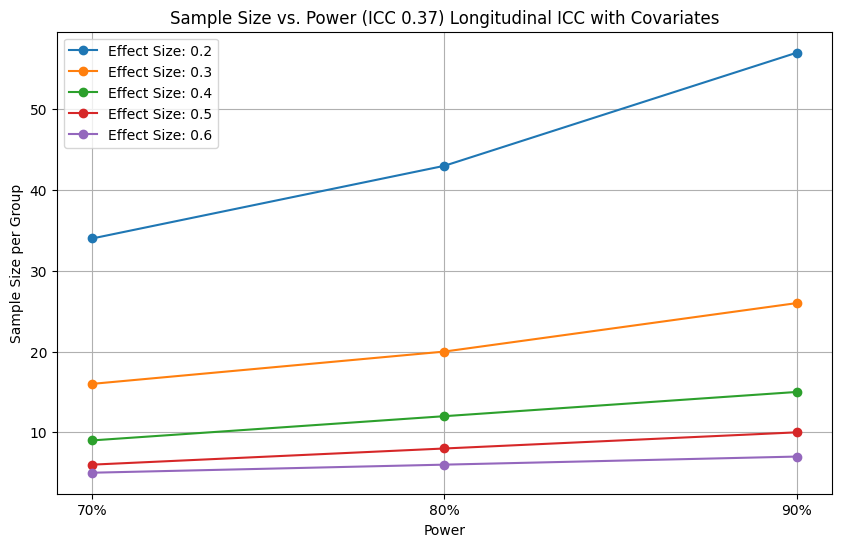

In [17]:
# Load CSV data
def load_data_from_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Data loaded successfully from {file_path}")
        return df
    except FileNotFoundError:
        print("File not found. Please check the file path.")
        return None

file_path = "data/df_cd_pilot_highICC.csv"  # Specify the file path here
df = load_data_from_csv(file_path)

# Function to perform ANOVA-based sample size calculation
def sample_size_anova(effect_size, num_groups, alpha=0.05, power=0.8):
    analysis = FTestAnovaPower()
    sample_size_per_group = analysis.solve_power(effect_size=effect_size, nobs=None, alpha=alpha, power=power, k_groups=num_groups)
    return int(np.ceil(sample_size_per_group))

# Function to adjust sample size for ICC
def adjust_sample_size_for_icc(n, m, icc):
    return n / (1 + (m - 1) * icc)

# Function to calculate ICC
def calculate_icc(model, residual_variance):
    random_effect_variance = model.cov_re.iloc[0, 0]  # Extract the variance of the random effect
    icc_value = random_effect_variance / (random_effect_variance + residual_variance)
    return icc_value

# Function to calculate adjusted effect size based on the model and residual variance
def calculate_adjusted_effect_size(df, residual_variance, selected_column):
    mean_group_var = df.groupby('Group')[selected_column].mean().var()
    effect_size = mean_group_var / residual_variance
    return effect_size

# Plot function for different effect sizes
def plot_sample_size_multiple_effects(power_levels, sample_sizes, effect_sizes, icc=None, title_suffix=""):
    plt.figure(figsize=(10, 6))
    for effect_size in effect_sizes:
        plt.plot(power_levels, sample_sizes[effect_size], marker='o', label=f"Effect Size: {effect_size:.1f}")
    
    if icc is not None:
        plt.title(f'Sample Size vs. Power (ICC {icc:.2f}) {title_suffix}')
    else:
        plt.title(f'Sample Size vs. Power {title_suffix}')
    
    plt.xlabel('Power')
    plt.ylabel('Sample Size per Group')
    plt.xticks([0.7, 0.8, 0.9], labels=["70%", "80%", "90%"])
    plt.grid(True)
    plt.legend()
    plt.savefig(f'Figures/DummyData_withEffectSizeRange_{title_suffix.replace(" ", "_")}.png')
    print(f"Plot saved: Figures/DummyData_withEffectSizeRange_{title_suffix.replace(' ', '_')}.png")
    plt.show()

# =================== USER INTERFACE ===================

# Ask the user for input
print("Welcome to the Sample Size Estimation Tool!")
print("1. Normal dataset (no repeated measures)")
print("2. Longitudinal dataset (repeated measures) - include ICC?")
print("3. Longitudinal dataset (repeated measures) - remove covariate effects and include ICC")

choice = input("Please choose the type of dataset analysis (1, 2, or 3): ")

# Define effect sizes and other parameters
effect_sizes = np.round(np.arange(0.2, 0.7, 0.1), 1)  # Range of effect sizes from 0.2 to 0.6, rounded to 1 decimal place
power_levels = [0.7, 0.8, 0.9]  # Desired power levels for analysis

# Dictionary to store sample sizes for each effect size
sample_sizes = {es: [] for es in effect_sizes}

if choice == "1":
    # Basic ANOVA-based Sample Size Calculation (no repeated measures, no ICC, no covariates)
    print("Performing basic ANOVA-based sample size estimation...")
    num_groups = 2  # Number of groups to compare
    
    for effect_size in effect_sizes:
        for power in power_levels:
            n = sample_size_anova(effect_size, num_groups, power=power)
            sample_sizes[effect_size].append(n)
            print(f"Effect Size: {effect_size}, Power: {power}, Sample Size per group: {n}")

    # Plot sample size vs. power for multiple effect sizes (Basic ANOVA)
    plot_sample_size_multiple_effects(power_levels, sample_sizes, effect_sizes, title_suffix="Basic ANOVA")

elif choice == "2":
    # Longitudinal Data with ICC Adjustment
    print("Performing sample size estimation for longitudinal data with ICC adjustment...")

    # Fit mixed-effects model without covariates
    selected_column = input("Enter the column for analysis (e.g., Shannon): ")
    model = MixedLM.from_formula(f"{selected_column} ~ Group + Time", groups="Subject_ID", data=df).fit()
    print(model.summary())

    # Calculate ICC from the model
    residual_variance = model.scale
    icc_value = calculate_icc(model, residual_variance)

    # Calculate adjusted effect size
    # effect_size = calculate_adjusted_effect_size(df, residual_variance, selected_column)
    
    num_groups = len(df['Group'].unique())
    num_timepoints = len(df['Time'].unique())

    for effect_size in effect_sizes:
        for power in power_levels:
            n = sample_size_anova(effect_size, num_groups, power=power)
            n_effective = adjust_sample_size_for_icc(n, num_timepoints, icc_value)
            sample_sizes[effect_size].append(int(np.ceil(n_effective)))
            print(f"Sample Size per group (Power: {power * 100}%, Effect Size: {effect_size:.2f}, ICC: {icc_value:.2f}): {n_effective:.2f}")

    # Plot sample size vs. power for the ICC condition
    plot_sample_size_multiple_effects(power_levels, sample_sizes, effect_sizes, icc=icc_value, title_suffix="Longitudinal ICC")

elif choice == "3":
    # Longitudinal Data with ICC and Covariate Adjustment
    print("Performing sample size estimation for longitudinal data with covariate adjustment and ICC...")

    # Fit mixed-effects model without covariates
    selected_column = input("Enter the column for analysis (e.g., Shannon): ")
    covariates = input("Please enter the covariates to adjust for (comma-separated, e.g., Antibiotic_Use,Illness,Diet): ").split(',')
    
    # Check if covariates exist in the dataframe
    if all([cov in df.columns for cov in covariates]):
        covariate_formula = " + ".join(covariates)

        # Fit mixed-effects model with covariates
        formula = f"{selected_column} ~ Group + Time + {covariate_formula}"
        model = MixedLM.from_formula(formula, groups="Subject_ID", data=df).fit()
        print(model.summary())

        # Calculate ICC from the model
        residual_variance = model.scale
        icc_value = calculate_icc(model, residual_variance)

        for effect_size in effect_sizes:
            for power in power_levels:
                n = sample_size_anova(effect_size, num_groups, power=power)
                n_effective = adjust_sample_size_for_icc(n, num_timepoints, icc_value)
                sample_sizes[effect_size].append(int(np.ceil(n_effective)))
                print(f"Sample Size per group (Power: {power * 100}%, Effect Size: {effect_size:.2f}, ICC: {icc_value:.2f}): {n_effective:.2f}")

        # Plot sample size vs. power for longitudinal data with covariate adjustment
        plot_sample_size_multiple_effects(power_levels, sample_sizes, effect_sizes, icc=icc_value, title_suffix="Longitudinal ICC with Covariates")
    
    else:
        print("Please check the covariate names and try again.")
else:
    print("Invalid choice. Please run the script again and choose a valid option.")

In [ ]:
# Section3: First generate Dummy data - Compute Effect size (using Shannon Diversity) using Dummy Diversity Values 
    # Type1: For group comparison - Annova Based
        # Provide effect size range
        # Number of Groups to compare
    # Type2: For longitudinal datasets - Linear Mixed model based
        # Provide effect size range
        # Number of Groups to compare
        # Number of iterations for longitudinal measure
        # Provide ICC value
    # Type3: For longitudinal datasets with effects of Covariates - Linear Mixed model based
        # Provide effect size range
        # Number of Groups to compare
        # Number of iterations for longitudinal measure
        # Provide ICC value
        # Covariates information If Required

Welcome to the Sample Size Estimation Tool!
1. Normal dataset (no repeated measures)
2. Longitudinal dataset (repeated measures) - include ICC?
3. Longitudinal dataset (repeated measures) - remove covariate effects and include ICC


Please choose the type of dataset analysis (1, 2, or 3):  2


Data loaded successfully from data/df_cd_pilot_highICC.csv
Columns available in the dataset:
1. Unnamed: 0
2. Subject_ID
3. Time
4. Shannon
5. Antibiotic_Use
6. Illness
7. Diet
8. Group


Please enter the column number you want to use for power calculation (default: Shannon):  Shannon


No valid column selected, defaulting to 'Shannon'.
Performing sample size estimation for longitudinal data with ICC adjustment...
           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  Shannon  
No. Observations:    550      Method:              REML     
No. Groups:          50       Scale:               0.3489   
Min. group size:     11       Log-Likelihood:      -547.3100
Max. group size:     11       Converged:           Yes      
Mean group size:     11.0                                   
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept          2.827    0.083 33.872 0.000  2.663  2.991
Group[T.CD_flare]  0.225    0.052  4.306 0.000  0.122  0.327
Time              -0.006    0.008 -0.718 0.473 -0.021  0.010
Group Var          0.205    0.085                           

Sample Size per group (Powe

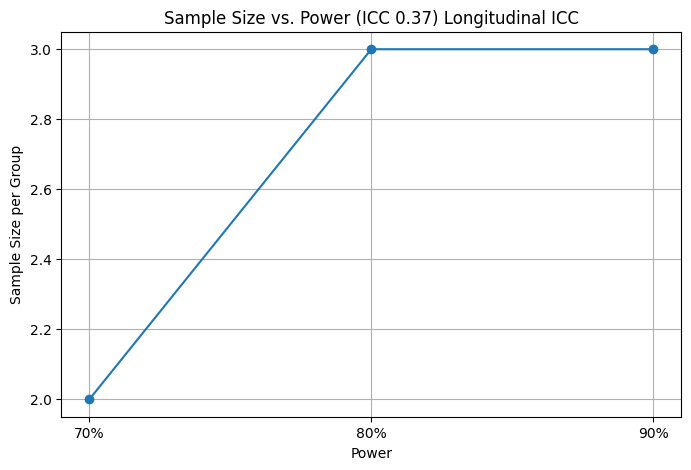

In [21]:
# Load CSV data
def load_data_from_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Data loaded successfully from {file_path}")
        return df
    except FileNotFoundError:
        print("File not found. Please check the file path.")
        return None

# Function to check covariates
def check_covariates(df, covariates):
    missing_covariates = [cov for cov in covariates if cov not in df.columns]
    if missing_covariates:
        print(f"Warning: The following covariates are not present in the dataset: {', '.join(missing_covariates)}")
    return len(missing_covariates) == 0

# Function to ask the user for the column to use
def ask_column_for_power_calculation(df):
    print("Columns available in the dataset:")
    for i, col in enumerate(df.columns):
        print(f"{i + 1}. {col}")
    
    column_choice = input("Please enter the column number you want to use for power calculation (default: Shannon): ")
    
    if column_choice.isdigit():
        column_choice = int(column_choice) - 1
        if column_choice >= 0 and column_choice < len(df.columns):
            return df.columns[column_choice]
    
    # Default to 'Shannon' if no valid input or input is empty
    print("No valid column selected, defaulting to 'Shannon'.")
    return 'Shannon'

# Function to calculate ICC (Intraclass Correlation Coefficient)
def calculate_icc(model, residual_variance):
    random_effect_variance = model.cov_re.iloc[0, 0]  # Variance of random effects
    total_variance = random_effect_variance + residual_variance
    icc = random_effect_variance / total_variance
    return icc

# Function to calculate adjusted effect size based on residual variance
def calculate_adjusted_effect_size(df, residual_variance, column_name):
    group_data = [df[df['Group'] == grp][column_name] for grp in df['Group'].unique()]
    group_means = [np.mean(group) for group in group_data]
    group_sizes = [len(group) for group in group_data]
    ss_between = np.sum([n * (mean - np.mean(df[column_name]))**2 for n, mean in zip(group_sizes, group_means)])
    eta_squared_adjusted = ss_between / (ss_between + residual_variance)
    return np.sqrt(eta_squared_adjusted)

# Function to perform ANOVA-based sample size calculation
def sample_size_anova(effect_size, num_groups, alpha=0.05, power=0.8):
    analysis = FTestAnovaPower()
    sample_size_per_group = analysis.solve_power(effect_size=effect_size, nobs=None, alpha=alpha, power=power, k_groups=num_groups)
    return int(np.ceil(sample_size_per_group))

# Function to adjust sample size for ICC
def adjust_sample_size_for_icc(n, m, icc):
    return n / (1 + (m - 1) * icc)

# Plot for each condition
def plot_sample_size(power_levels, sample_sizes, icc=None, title_suffix=""):
    plt.figure(figsize=(8, 5))
    
    if icc is not None:
        plt.plot(power_levels, [sample_sizes[power] for power in power_levels], marker='o')
        plt.title(f'Sample Size vs. Power (ICC {icc:.2f}) {title_suffix}')
    else:
        plt.plot(power_levels, [sample_sizes[power] for power in power_levels], marker='o')
        plt.title(f'Sample Size vs. Power {title_suffix}')
    
    plt.xlabel('Power')
    plt.ylabel('Sample Size per Group')
    plt.xticks([0.7, 0.8, 0.9], labels=["70%", "80%", "90%"])
    plt.grid(True)
    plt.savefig(f'Figures/DummyData_CompEffectSize_{title_suffix.replace(" ", "_")}.png')
    print(f"Plot saved: Figures/DummyData_CompEffectSize_{title_suffix.replace(' ', '_')}.png")
    plt.show()

# =================== USER INTERFACE ===================

# Ask the user for input
print("Welcome to the Sample Size Estimation Tool!")
print("1. Normal dataset (no repeated measures)")
print("2. Longitudinal dataset (repeated measures) - include ICC?")
print("3. Longitudinal dataset (repeated measures) - remove covariate effects and include ICC")

choice = input("Please choose the type of dataset analysis (1, 2, or 3): ")

#file_path = "df_cd_pilot_highICC.csv"  # This file has High ICC values too; Effect size is already High
file_path = "data/df_cd_pilot_highICC.csv"  # Specify the file path here
df = load_data_from_csv(file_path)

# Ask user for the column to use in power calculations
selected_column = ask_column_for_power_calculation(df)

if choice == "1":
    # Basic ANOVA-based Sample Size Calculation (no repeated measures, no ICC, no covariates)
    print("Performing basic ANOVA-based sample size estimation...")
    residual_variance = np.var(df[selected_column])  # Total variance
    effect_size = calculate_adjusted_effect_size(df, residual_variance, selected_column)
    num_groups = len(df['Group'].unique())
    power_levels = [0.7, 0.8, 0.9]

    sample_sizes_basic = {}

    for power in power_levels:
        n = sample_size_anova(effect_size, num_groups, power=power)
        sample_sizes_basic[power] = n
        print(f"Sample Size per group (Power: {power * 100}%, Effect Size: {effect_size:.2f}): {n}")

    # Plot sample size vs. power (Basic ANOVA)
    plot_sample_size(power_levels, sample_sizes_basic, title_suffix="Basic ANOVA")

elif choice == "2":
    # Longitudinal Data with ICC Adjustment
    print("Performing sample size estimation for longitudinal data with ICC adjustment...")

    # Fit mixed-effects model without covariates
    model = mixedlm(f"{selected_column} ~ Group + Time", df, groups=df["Subject_ID"]).fit()
    print(model.summary())

    # Calculate ICC from the model
    residual_variance = model.scale
    icc_value = calculate_icc(model, residual_variance)

    sample_sizes_icc = {}

    # Calculate adjusted effect size
    effect_size = calculate_adjusted_effect_size(df, residual_variance, selected_column)

    num_groups = len(df['Group'].unique())
    num_timepoints = len(df['Time'].unique())
    power_levels = [0.7, 0.8, 0.9]

    for power in power_levels:
        n = sample_size_anova(effect_size, num_groups, power=power)
        n_effective = adjust_sample_size_for_icc(n, num_timepoints, icc_value)
        sample_sizes_icc[power] = int(np.ceil(n_effective))
        print(f"Sample Size per group (Power: {power * 100}%, Effect Size: {effect_size:.2f}, ICC: {icc_value:.2f}): {n_effective:.2f}")

    # Plot sample size vs. power for the ICC condition
    plot_sample_size(power_levels, sample_sizes_icc, icc=icc_value, title_suffix="Longitudinal ICC")

elif choice == "3":
    # Longitudinal Data with ICC and Covariate Adjustment
    print("Performing sample size estimation for longitudinal data with covariate adjustment and ICC...")
    
    covariates = input("Please enter the covariates to adjust for (comma-separated, e.g., Antibiotic_Use,Illness,Diet): ").split(',')
    
    # Check if covariates exist in the dataframe
    if check_covariates(df, covariates):
        covariate_formula = " + ".join(covariates)

        # Fit mixed-effects model with covariates
        formula = f"{selected_column} ~ Group + Time + {covariate_formula}"
        model = mixedlm(formula, df, groups=df["Subject_ID"]).fit()
        print(model.summary())

        # Calculate ICC from the model
        residual_variance = model.scale
        icc_value = calculate_icc(model, residual_variance)

        sample_sizes_cov_icc = {}

        # Calculate adjusted effect size
        effect_size = calculate_adjusted_effect_size(df, residual_variance, selected_column)

        num_groups = len(df['Group'].unique())
        num_timepoints = len(df['Time'].unique())
        power_levels = [0.7, 0.8, 0.9]

        for power in power_levels:
            n = sample_size_anova(effect_size, num_groups, power=power)
            n_effective = adjust_sample_size_for_icc(n, num_timepoints, icc_value)
            sample_sizes_cov_icc[power] = int(np.ceil(n_effective))
            print(f"Sample Size per group (Power: {power * 100}%, Effect Size: {effect_size:.2f}, ICC: {icc_value:.2f}): {n_effective:.2f}")

        # Plot sample size vs. power for longitudinal data with covariate adjustment
        plot_sample_size(power_levels, sample_sizes_cov_icc, icc=icc_value, title_suffix="Longitudinal ICC with Covariates")
    
    else:
        print("Please check the covariate names and try again.")

else:
    print("Invalid choice. Please run the script again and choose a valid option.")